::: {.callout-note title="Colab Link"}

<center>

[![](images/colab-badge.svg)<br>Click here to **open in Colab**](https://colab.research.google.com/drive/125YQ7Wqo5vQG4ko3NqUs8EvYU6hmbEul){target="_blank"}

</center>

:::

Since my last two data adventures were focused on <a href='https://jjacobs.me/dsan5000/463a01339cf0f456ba54a1849df50d1a22c247e3/writeups/data-cleaning/clean_data.html' target='_blank'>public health data</a> and <a href='https://jjacobs.me/dsan5000/463a01339cf0f456ba54a1849df50d1a22c247e3/writeups/eda-seaborn/THOR_EDA_with_Seaborn.html' target='_blank'>international relations data</a>, this week I'm going to focus on the topic that is tied for the most common topic students are doing for their projects, namely, **sports data**!

This time, rather than worrying about cleaning the data or exploring the data, we will "fast forward" to a particular task: **using** the data to accomplish a task, namely, **predicting success in the NBA (National Basketball Association)**.

I chose the NBA because, unlike the NFL (National Football League) and the MLB (Major League Baseball) for example, the NBA is popular both inside **and** outside the US. But, if you don't know anything about the NBA don't worry, I will do my best to explain what's going on at each point in the lab (and, as we'll see in a moment, there is a **codebook** providing full explanations for each variable)

## (1) The Dataset

For this lab we'll be analyzing a **panel dataset** where each row represents a **(team, season) pair**.

A complicating factor in analyzing NBA data is that, unlike other sports like baseball, each NBA season spans **two years**: meaning, for example, <a href='https://en.wikipedia.org/wiki/2022%E2%80%9323_NBA_season' target='_blank'>the most recent season</a> began in 2022 but ended in 2023. To make things easier for us, then, rather than recording seasons as two-year spans, I have simplified the dataset so that the **year** for each row represents the year in which the **playoffs** for that season occurred. To make this as clear as possible when examining the dataset, I've named the year variable `po_year` (for **playoff year**).

Like we did for the <a href='https://jjacobs.me/dsan5000/463a01339cf0f456ba54a1849df50d1a22c247e3/writeups/eda-seaborn/THOR_EDA_with_Seaborn.html' target='_blank'>exploratory data analysis lab</a>, let's first **download the dataset using the `requests` library** to the same folder as this notebook, so that we don't have to re-download the dataset every time we want to use it (meaning, once you run the following cell **once**, you don't need to run it again, even if you restart the notebook)

In [1]:
import requests
data_fname = "nba_team_data.csv"
nba_url = f"https://jpj.georgetown.domains/dsan5000-scratch/feature-selection/{data_fname}"
with open(data_fname, 'wb') as outfile:
  data_content = requests.get(nba_url, stream=True).content
  outfile.write(data_content)

And one more cell, this time downloading the **codebook** for the dataset:

In [2]:
codebook_fname = "nba_team_codebook.csv"
codebook_url = f"https://jpj.georgetown.domains/dsan5000-scratch/feature-selection/{codebook_fname}"
with open(codebook_fname, 'wb') as outfile:
  codebook_content = requests.get(codebook_url, stream=True).content
  outfile.write(codebook_content)

You should now have a file called `nba_team_data.csv` within the same folder as this notebook. Let's open the data file using Pandas and examine the first few rows:

In [3]:
import pandas as pd
import numpy as np

In [4]:
nba_df = pd.read_csv("nba_team_data.csv")
nba_df.head()

,year_team,po_year,team_full,mean_age,mean_height,mean_weight,PtsSeason,OppPtsSeason,PtsDiff,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,playoffs
0,1998_Atlanta Hawks,1998,Atlanta Hawks,28.250000,199.231250,99.166551,95.9,92.3,3.6,42.8,19.0,8.0,5.9,14.0,20.5,29.5,13.4,True
1,1998_Boston Celtics,1998,Boston Celtics,25.857143,200.297143,95.027524,95.9,98.5,-2.6,39.5,22.1,12.0,4.5,15.6,26.9,24.9,14.6,False
2,1998_Charlotte Hornets,1998,Charlotte Hornets,29.733333,200.829333,101.755805,96.6,94.6,2.0,40.1,23.4,8.2,3.7,14.4,21.4,28.4,11.7,True
3,1998_Chicago Bulls,1998,Chicago Bulls,30.600000,201.337333,103.691131,96.7,89.6,7.1,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,True
4,1998_Cleveland Cavaliers,1998,Cleveland Cavaliers,26.375000,199.231250,96.756844,92.5,89.8,2.7,39.8,22.9,9.9,5.0,16.6,23.7,28.2,11.6,True


As we've talked about in previous lectures, you can use your Data Terminator vision to begin understanding "what's going on" in this dataset by

1. Sweeping your eyes over each **row**, to figure out what the rows represent,
2. Sweeping your eyes over each **column**, to figure out what the columns represent,
3. Examining whether there is a **unique ID** for each observation, and then
4. (If the data is already tidy) looking at individual **values** to determine what they represent: for example, by looking at a value within the `mean_age` column, can we infer what the **units** of this column are? (In this case, the answer is **years**).

Now let's look at the **codebook**:

In [5]:
codebook_df = pd.read_csv("nba_team_codebook.csv")
codebook_df

,variable,description,type
0,year_team,Unique identifier of the form {po_year}_{team_...,str
1,po_year,The year that the season's playoffs took place...,int
2,team_full,Full name of the team,str
3,mean_age,"Mean age of the team's members that year, in y...",float
4,mean_height,"Mean height of the team's members that year, i...",float
5,mean_weight,"Mean weight of the team's members that year, i...",float
6,PtsSeason,The team's average points per game that year,float
7,OppPtsSeason,The average number of points scored by the tea...,float
8,PtsDiff,The difference between PtsSeason and OppPtsSeason,float
9,Reb,The team's average number of rebounds per game...,float


We can use this codebook to obtain a **description** for any variable we don't understand. For example, if we don't know what the `OppPtsSeason` variable means, we can use Pandas' `.loc[]` syntax to obtain just the row in the codebook corresponding to this variable, and examine the full `description` value in this row:

In [6]:
var_row = codebook_df.loc[codebook_df['variable'] == "OppPtsSeason","description"]
var_row

7    The average number of points scored by the tea...
Name: description, dtype: object

Note that this is not entirely satisfactory, since the full `description` value is cut off---this happens because the `.loc[]` syntax returns a `pd.Series` object containing **all matches**. In this case, since we know there is only going to be **one** match, we can take the result of the `.loc[]` call and extract just the first (and only) match by extracting `.iloc[0]`:

In [7]:
var_row.iloc[0]

"The average number of points scored by the team's opponents that year"

And we see that now, rather than a `pd.Series` object, we have the full **string** description of the variable we wanted a description for.

> **Quick aside: `DataFrame` to `dict`**<br><br>Given how much work it took just now to extract the description for `OppPtsSeason`, you may have a hunch that a `pd.DataFrame` is probably **not** the most efficient format for storing a codebook.<br><br>For this reason, when I am working with codebooks, I usually convert the `pd.DataFrame` containing the codebook into a more straightforward **Python dictionary** object.

In [8]:
codebook_dict = codebook_df.set_index('variable').to_dict(orient='index')

> Now we can more easily check the information we have about a variable: `codebook_dict` is a set of key-value pairs, where the keys are the **variable names** and the values are the **information** we have about that variable. Now, for example, to access all of the information we have about the `Blk` variable, we can just run the following line of code:

In [9]:
codebook_dict['Blk']

{'description': "The team's average number of blocks per game that year",
 'type': 'float'}

## (2) The Supervised Learning Task

Now that we have a feel for the data, I can reveal the **task** we're hoping to accomplish by examining this data:

> **Our aim is to develop a *model* of team-level "success" in the NBA, by finding what *properties* of a (team,season) pair best predict whether or not the team *makes the playoffs* that year.**

We can gain some initial intuition around this task by, for example, creating a **cross-tabulation** showing how particular variables differ between teams that **did** and **did not** make the playoffs in a given year.

*(Note that this is **not** a very effective way of using cross-tabulation, since it is very rare for two (team,season) pairs to have the exact same average number of points, but it suffices here to show a general pattern)*

In [10]:
pd.crosstab(nba_df['PtsSeason'], nba_df['playoffs'])

playoffs,False,True
PtsSeason,,
81.9,1,0
84.2,1,0
84.8,1,0
85.4,1,0
85.6,1,0
...,...,...
117.0,0,1
117.7,0,1
117.8,0,1


From this cross-tabulation, we can already see an interesting aspect of the data: looking at the **first five rows** of the cross-tabulation, we can see that

> For every (team,season) pair where the team scored **85.6 points per game or less**, that team **failed to make the playoffs** in that season.

Then, looking at the **last five rows** of the cross-tabulation, we can see that

> For every (team,season) pair where the team scored **117.0 points per game or more**, that team **successfully made the playoffs** in that season.

Therefore, if we consider this as an EDA step, we may start to formulate a hypothesis that **scoring more points per game increases the likelihood of making the playoffs**. This may seem like an intuitive/obvious point, but remember that the point of EDA is for us to **probe** and **challenge** our preexisting (**prior!**) intuitions, seeing whether or not they hold or fail to hold when we actually look at the data, and updating our priors accordingly.

Now, to make sure that we're not relying on **engineer's induction** here---meaning, to check whether this pattern that we see in the first 5 and last 5 rows actually holds across the entire dataset---let's make a new dummy variable `above_mean_pts` which is equal to **1** if the team's points per game in a given season was **above** the mean points per game across all teams in that season, and equal to **0** otherwise.

As a way to help us compute this variable, and to show the usefulness of a topic from lecture, let's first compute the **$z$-score** for each (team,season) pair: that is, compute a new column containing the score $z_{i,t}$ for team $i$ in season $t$ as

$$
z_{i,t} = \frac{\texttt{pts}_{i,t} - \mu_t}{\sigma_t},
$$

where $\mu_t$ represents the **mean** of all teams' points per game stat in season $t$, and $\sigma_t$ represents the **standard deviation** of all teams' points per game stat in season $t$:

In [11]:
compute_z_score = lambda x: (x - x.mean()) / x.std()
nba_df['season_pts_z_score'] = nba_df.groupby('po_year')['PtsSeason'].transform(compute_z_score)

In [12]:
#compute_z_score = lambda x: (x - x.mean()) / x.std()
#nba_df.insert(0, 'pts_z_score', nba_df.groupby('po_year')['PtsSeason'].transform(compute_z_score))

In [13]:
nba_df.head()

,year_team,po_year,team_full,mean_age,mean_height,mean_weight,PtsSeason,OppPtsSeason,PtsDiff,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,playoffs,season_pts_z_score
0,1998_Atlanta Hawks,1998,Atlanta Hawks,28.250000,199.231250,99.166551,95.9,92.3,3.6,42.8,19.0,8.0,5.9,14.0,20.5,29.5,13.4,True,0.082901
1,1998_Boston Celtics,1998,Boston Celtics,25.857143,200.297143,95.027524,95.9,98.5,-2.6,39.5,22.1,12.0,4.5,15.6,26.9,24.9,14.6,False,0.082901
2,1998_Charlotte Hornets,1998,Charlotte Hornets,29.733333,200.829333,101.755805,96.6,94.6,2.0,40.1,23.4,8.2,3.7,14.4,21.4,28.4,11.7,True,0.261932
3,1998_Chicago Bulls,1998,Chicago Bulls,30.600000,201.337333,103.691131,96.7,89.6,7.1,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,True,0.287508
4,1998_Cleveland Cavaliers,1998,Cleveland Cavaliers,26.375000,199.231250,96.756844,92.5,89.8,2.7,39.8,22.9,9.9,5.0,16.6,23.7,28.2,11.6,True,-0.786678


Now that we've applied this transformation to `PtsSeason`, given what we know about the $z$-score, we know that teams whose points per game stat was **above the average** for all teams in that season will have a **positive** $z$-score, and teams whose points per game stat was **below the average** will have a **negative** $z$-score. Therefore, we can compute our desired `above_mean_pts` variable by just checking whether or not the $z$-score is positive:

In [14]:
nba_df['above_mean_pts'] = nba_df['season_pts_z_score'] > 0

In [15]:
nba_df

,year_team,po_year,team_full,mean_age,mean_height,mean_weight,PtsSeason,OppPtsSeason,PtsDiff,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,playoffs,season_pts_z_score,above_mean_pts
0,1998_Atlanta Hawks,1998,Atlanta Hawks,28.250000,199.231250,99.166551,95.9,92.3,3.6,42.8,19.0,8.0,5.9,14.0,20.5,29.5,13.4,True,0.082901,True
1,1998_Boston Celtics,1998,Boston Celtics,25.857143,200.297143,95.027524,95.9,98.5,-2.6,39.5,22.1,12.0,4.5,15.6,26.9,24.9,14.6,False,0.082901,True
2,1998_Charlotte Hornets,1998,Charlotte Hornets,29.733333,200.829333,101.755805,96.6,94.6,2.0,40.1,23.4,8.2,3.7,14.4,21.4,28.4,11.7,True,0.261932,True
3,1998_Chicago Bulls,1998,Chicago Bulls,30.600000,201.337333,103.691131,96.7,89.6,7.1,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,True,0.287508,True
4,1998_Cleveland Cavaliers,1998,Cleveland Cavaliers,26.375000,199.231250,96.756844,92.5,89.8,2.7,39.8,22.9,9.9,5.0,16.6,23.7,28.2,11.6,True,-0.786678,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2020_Sacramento Kings,2020,Sacramento Kings,25.117647,199.763529,98.242691,110.1,112.1,-2.0,42.6,23.8,7.7,4.1,13.7,22.2,32.9,9.7,False,-0.411031,False
679,2020_San Antonio Spurs,2020,San Antonio Spurs,25.750000,199.390000,99.223250,114.1,115.2,-1.1,44.6,24.7,7.3,5.5,12.2,19.4,35.6,9.0,False,0.627363,True
680,2020_Toronto Raptors,2020,Toronto Raptors,25.555556,198.261111,96.539497,112.8,106.5,6.3,45.3,25.2,8.6,5.0,13.8,21.8,36.0,9.3,True,0.289885,True
681,2020_Utah Jazz,2020,Utah Jazz,25.666667,196.285556,98.353865,111.3,108.8,2.5,44.6,22.3,6.1,4.0,14.2,20.3,35.4,9.1,True,-0.099513,False


And, finally, we can generate a much more useful cross-tabulation of our variables:

In [16]:
pts_playoffs_count = pd.crosstab(nba_df['above_mean_pts'], nba_df['playoffs'])
pts_playoffs_count

playoffs,False,True
above_mean_pts,,
False,209,137
True,106,231


And then **plot** the values in this cross-tabulation for an even more intuitive representation, where for each value of `above_mean_pts` we will have a bar representing the **total** number of (team,season) pairs in our dataset where the team had above-the-mean points per game in that season, and each bar will be **further split** into two "sub-rectangles" representing the **proportions** of these counts representing teams which **also** made the playoffs in that season:

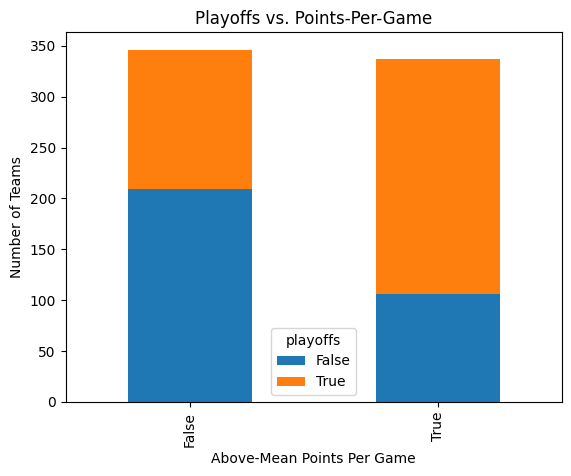

In [17]:
import matplotlib.pyplot as plt

crosstab_plot = pts_playoffs_count.plot(kind='bar', stacked=True)
crosstab_plot.grid(False)
plt.title('Playoffs vs. Points-Per-Game')
plt.xlabel('Above-Mean Points Per Game')
plt.ylabel('Number of Teams')
plt.show()


Notice how, in both the cross-tabulation and plot above, having raw counts on their own was a bit of a nuisance, in the sense that we really care about their **proportions** to one another. The plot made this a bit easier, since we could compare the areas of the two sub-rectangles within each bar, but it'd be more helpful if we could read these totals directly off of the cross-tabulation. To accomplish this, we can include the `margins=True` argument to `pd.crosstab()` and it will produce, in addition to the output above, a **totals column** and **totals row**:

In [18]:
pts_playoffs_count = pd.crosstab(nba_df['above_mean_pts'], nba_df['playoffs'], margins=True)
pts_playoffs_count

playoffs,False,True,All
above_mean_pts,,,
False,209,137,346
True,106,231,337
All,315,368,683


We can see from this table that, among all **337 (team,season) pairs** where the team had **above average** points-per-game in that season, the team made the playoffs **231 times** and failed to make the playoffs **106 times**. On the other hand, of the **346 (team,season) pairs** where the team had **below average** points-per-game in that season, that team made the playoffs only **137 times** and failed to make the playoffs in **209 cases**.

Notice how I'm giving raw counts here, but contextualizing them by also providing the **total number of cases** in each row. The `pd.crosstab()` function has another optional parameter `normalize` (on top of the `margins=True` option we provided above) which will do this **normalization** for us, thus producing actual full-on **probability distributions**:

* By default, the produced table contains **counts**, not probabilities
* If we include `normalize='all'`, Pandas will generate a table representing the **joint distribution** of the pair of variables (`above_mean_points`,`playoffs`):

In [19]:
pts_playoffs_joint = pd.crosstab(nba_df['above_mean_pts'], nba_df['playoffs'], normalize='all')
pts_playoffs_joint

playoffs,False,True
above_mean_pts,,
False,0.306003,0.200586
True,0.155198,0.338214


So that from this table we can see that, for example, about 20% of all (team,season) pairs represent teams that made the playoffs despite having below-the-mean points per game in that season.

* If we include `normalize='all'` **in addition to** `margins=True`, Pandas will produce a table representing both the **joint distribution** (within the non-total cells) and the **marginal distributions** (in the row/column labeled `All`):

In [20]:
pd.crosstab(nba_df['above_mean_pts'], nba_df['playoffs'], margins=True, normalize='all')

playoffs,False,True,All
above_mean_pts,,,
False,0.306003,0.200586,0.506589
True,0.155198,0.338214,0.493411
All,0.461201,0.538799,1.000000


So that from the row labeled `All` in this table we can see that, for example, approximately 46% of all (team, season) pairs in the dataset correspond to teams who made the playoffs in that season.

* If we include `normalize='index'`, Pandas will generate a table representing the **conditional distribution** of `playoffs` given `above_mean_points`:

In [21]:
pd.crosstab(nba_df['above_mean_pts'], nba_df['playoffs'], normalize='index')

playoffs,False,True
above_mean_pts,,
False,0.604046,0.395954
True,0.314540,0.685460


Notice that the **rows** here (but **not** the columns) sum to 1. This table therefore tells us, for example, that across all (team,season) pairs where the team had **above-the-mean** points per game in that season (`above_mean_points` is `True`), about 69% of these teams made the playoffs in that season.

* Finally, if we include `normalize='columns'`, Pandas will produce a table representing the **conditional distribution** of `above_mean_pts` given `playoffs`:

In [22]:
pd.crosstab(nba_df['above_mean_pts'], nba_df['playoffs'], normalize='columns')

playoffs,False,True
above_mean_pts,,
False,0.663492,0.372283
True,0.336508,0.627717


Notice that now the **columns** (but **not** the rows) sum to 1. This table therefore tells us, for example, that among (team,season) pairs where the team made the playoffs in that season (`playoffs` is `True`), about **63%** of these pairs correspond to teams which had **above-the-mean** points per game in that season.

## (3) Machine Learning *Without* Feature Selection

While the cross-tabulations/plots in the previous section can help us think about the relationships between our **features** (all of the non-ID variables besides `playoffs`) and our **label** (the `playoffs` variable), and which features might be more or less helpful for **predicting** the labels for each (team,season) pair, we're going to need to have a set of **metrics** for measuring **how well** we're doing at this prediction task, as well as a **range of values** that these metrics may take on telling us whether we're doing "not very well" vs. "very well" on the task.

In general, a very good rule-of-thumb to use in machine learning is to come up with a **baseline value** and **gold standard value** for the metric. In our case, for example, we can quickly think about generating the following two values:

1. A **baseline value** of our success metric, which tells us how well an algorithm **randomly guessing** would do on the task---in other words, an algorithm that is **not learning anything at all**. If we just write a function that randomly guesses `False` or `True` as the `playoff` value for a given (team, season) pair, how well does that function do on our task?
2. Another **baseline value** which is slightly smarter, but only slightly: it should guess the **most common value** of the label **every single time**. In our case, since there are more (team,season) pairs representing teams which **made the playoffs** in that season than there are (team,season) pairs representing teams which **failed** to make the playoffs, this baseline value would be derived from a function that always guesses the value `True` for our `playoffs` label.
3. Finally, since here we're trying to look at the efficacy of **feature selection**, we should take an "off-the-shelf" machine learning method and see how well it does **without performing any feature selection**.

## (4) Baseline 1: Random Guessing

Although it may seem weird at first to sit down and purposefully code a "bad" model, you will thank yourself for it later, since it can serve as a "meter stick" to help you keep track of progress that you're making as you improve/tweak your **real** model's parameters.

So, making sure that we **set the seed** on NumPy's random number generator so that results are replicable from here on out, let's create this random-guessing baseline model:

In [23]:
# Here we set the seed by creating a "random generator object"
# in NumPy, which we'll use from here onwards when we need to
# generate random numbers
rng = np.random.default_rng(5000)

As we move from data exploration to actual machine learning, also, we'll want to convert our **boolean** `playoffs` label into a **numeric value**, since many of the ML algorithms and evaluation functions in Scikit-learn require fully-numeric values (vectors and/or matrices, for example) as inputs.

To do this, we'll use what I think is the easiest way to convert **booleans** into **integers** in Pandas, which is just to `apply()` Python's `int()` conversion function to the entire column:

In [24]:
nba_df['playoffs'] = nba_df['playoffs'].apply(int)
nba_df

,year_team,po_year,team_full,mean_age,mean_height,mean_weight,PtsSeason,OppPtsSeason,PtsDiff,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,playoffs,season_pts_z_score,above_mean_pts
0,1998_Atlanta Hawks,1998,Atlanta Hawks,28.250000,199.231250,99.166551,95.9,92.3,3.6,42.8,19.0,8.0,5.9,14.0,20.5,29.5,13.4,1,0.082901,True
1,1998_Boston Celtics,1998,Boston Celtics,25.857143,200.297143,95.027524,95.9,98.5,-2.6,39.5,22.1,12.0,4.5,15.6,26.9,24.9,14.6,0,0.082901,True
2,1998_Charlotte Hornets,1998,Charlotte Hornets,29.733333,200.829333,101.755805,96.6,94.6,2.0,40.1,23.4,8.2,3.7,14.4,21.4,28.4,11.7,1,0.261932,True
3,1998_Chicago Bulls,1998,Chicago Bulls,30.600000,201.337333,103.691131,96.7,89.6,7.1,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,1,0.287508,True
4,1998_Cleveland Cavaliers,1998,Cleveland Cavaliers,26.375000,199.231250,96.756844,92.5,89.8,2.7,39.8,22.9,9.9,5.0,16.6,23.7,28.2,11.6,1,-0.786678,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2020_Sacramento Kings,2020,Sacramento Kings,25.117647,199.763529,98.242691,110.1,112.1,-2.0,42.6,23.8,7.7,4.1,13.7,22.2,32.9,9.7,0,-0.411031,False
679,2020_San Antonio Spurs,2020,San Antonio Spurs,25.750000,199.390000,99.223250,114.1,115.2,-1.1,44.6,24.7,7.3,5.5,12.2,19.4,35.6,9.0,0,0.627363,True
680,2020_Toronto Raptors,2020,Toronto Raptors,25.555556,198.261111,96.539497,112.8,106.5,6.3,45.3,25.2,8.6,5.0,13.8,21.8,36.0,9.3,1,0.289885,True
681,2020_Utah Jazz,2020,Utah Jazz,25.666667,196.285556,98.353865,111.3,108.8,2.5,44.6,22.3,6.1,4.0,14.2,20.3,35.4,9.1,1,-0.099513,False


We can now see in the above table that (scrolling horizontally to the `playoffs` column) entries where the `playoffs` value was the boolean `True` now have the integer value `1`, and entries where the `playoffs` value was the boolean `False` now have the integer value `0`.

Given our `nba_df` dataset with the now-numeric label, we can make a new column called `random_guess` which just generates a random boolean value for each observation, then compute how well this random-guess model is doing by comparing the `random_guess` model with the true values in `playoffs`.



> **Imporant Aside: Accuracy vs. F1 Score!**<br><br>You have maybe noticed that I'm being purposefully vague about measuring **how well** a given classifier is doing: that's because, while it may feel instinctively "right"/natural to say "I'll see how well my classifier is doing by measuring its **accuracy** on a task", the notion of **accuracy** in machine learning is (sadly but truly) a **🚨RED FLAG🚨** that you should learn to be wary of! Let's quickly see why, by going over to the<br><br>**<a href='https://jjacobs.me/dsan5000/463a01339cf0f456ba54a1849df50d1a22c247e3/writeups/machine-learning/slides.html#/title-slide' target='_blank'>Extra slides on Machine Learning</a>**<br><br>that are now posted in the "Extra Writeups" section of the website for my sections.<br><br> Specifically, you should look at them from the beginning (they overlap, purposefully, with the slides from this week where I started talking about **Supervised** vs. **Unsupervised** learning on the liked-and-disliked-houses dataset) up to the **Measuring Errors: F1 Score** slide, which will introduce you to the **F1 Score** that we will be using here to quantify how well/not-well our random-guessing approach is doing at our task.

Now that we have seen why the F1 score is preferable to accuracy as a measurement of the performance of our algorithms, let's generate guesses and evaluate our random-guess model using the F1 score:

In [25]:
# Generate one random guess (a random choice of an element from
# the python list [0,1]) per observation in the dataset
num_obs = len(nba_df)
random_guesses = rng.choice([0,1], num_obs)
nba_df['random_guess'] = random_guesses
nba_df

,year_team,po_year,team_full,mean_age,mean_height,mean_weight,PtsSeason,OppPtsSeason,PtsDiff,Reb,...,Stl,Blk,To,Pf,Dreb,Oreb,playoffs,season_pts_z_score,above_mean_pts,random_guess
0,1998_Atlanta Hawks,1998,Atlanta Hawks,28.250000,199.231250,99.166551,95.9,92.3,3.6,42.8,...,8.0,5.9,14.0,20.5,29.5,13.4,1,0.082901,True,0
1,1998_Boston Celtics,1998,Boston Celtics,25.857143,200.297143,95.027524,95.9,98.5,-2.6,39.5,...,12.0,4.5,15.6,26.9,24.9,14.6,0,0.082901,True,0
2,1998_Charlotte Hornets,1998,Charlotte Hornets,29.733333,200.829333,101.755805,96.6,94.6,2.0,40.1,...,8.2,3.7,14.4,21.4,28.4,11.7,1,0.261932,True,0
3,1998_Chicago Bulls,1998,Chicago Bulls,30.600000,201.337333,103.691131,96.7,89.6,7.1,44.1,...,8.6,4.3,13.0,21.1,29.2,14.9,1,0.287508,True,0
4,1998_Cleveland Cavaliers,1998,Cleveland Cavaliers,26.375000,199.231250,96.756844,92.5,89.8,2.7,39.8,...,9.9,5.0,16.6,23.7,28.2,11.6,1,-0.786678,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2020_Sacramento Kings,2020,Sacramento Kings,25.117647,199.763529,98.242691,110.1,112.1,-2.0,42.6,...,7.7,4.1,13.7,22.2,32.9,9.7,0,-0.411031,False,1
679,2020_San Antonio Spurs,2020,San Antonio Spurs,25.750000,199.390000,99.223250,114.1,115.2,-1.1,44.6,...,7.3,5.5,12.2,19.4,35.6,9.0,0,0.627363,True,0
680,2020_Toronto Raptors,2020,Toronto Raptors,25.555556,198.261111,96.539497,112.8,106.5,6.3,45.3,...,8.6,5.0,13.8,21.8,36.0,9.3,1,0.289885,True,1
681,2020_Utah Jazz,2020,Utah Jazz,25.666667,196.285556,98.353865,111.3,108.8,2.5,44.6,...,6.1,4.0,14.2,20.3,35.4,9.1,1,-0.099513,False,1


We could compute the F1 score **manually** here (and it would be good practice/coding work for you!), but instead now we will finally import and use **Scikit-learn**, which has a <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html' target='_blank'>**built-in** function for computing F-scores</a>. To use it, we just need to provide the first two arguments, `y_true` and `y_pred`:

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(nba_df['playoffs'], nba_df['random_guess'])

0.5313351498637602

We can now also compute accuracy as

$$
\frac{\#\text{ Correct guesses}}{\#\text{ Total guesses}}
$$

to see the difference between F1 score and accuracy:

In [28]:
nba_df['random_guess_correct'] = nba_df['playoffs'] == nba_df['random_guess']
correct_random_guess_rows = nba_df[nba_df['random_guess_correct'] == True]
random_guess_accuracy = len(correct_random_guess_rows) / len(nba_df)
random_guess_accuracy

0.49633967789165445

## (5) Baseline 2: Guessing the Most Frequent Label

The two metrics (accuracy and F1 score) don't seem so different in this case, but now let's implement the **second baseline model** mentioned above, where we **always guess the most frequent label** no matter what observation we're looking at.

Notice how, just as in the random-guessing case, here we are **not even looking at the features of the individual observations at all**. And yet, here we will almost always achieve a **higher accuracy** than the random-guessing approach, essentially because we are allowing a small "bit" of information about the labels to enter our algorithm here: whereas the random-guess model truly knows nothing about the distribution of labels in the dataset, the guess-most-frequent-label approach **does** know that there are more observations with a `playoffs` value of `1` than with a `playoffs` value of `0`, and it is able to take advantage of this information:

In [29]:
# Since datasets can technically have more than one mode, the
# mode() function in Pandas returns a pd.Series object containing
# all of the mode values. Since in this case we know that there is
# only **one** mode (the value 1), we can just convert this
# one-item pd.Series directly into an integer value using Python's
# int() method:
most_frequent_label = int(nba_df['playoffs'].mode())
most_frequent_label

/var/folders/n2/m7_fj5vx6c50_yj7g23mwmq00000gn/T/ipykernel_10671/1516993167.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  most_frequent_label = int(nba_df['playoffs'].mode())


1

In [30]:
nba_df['most_freq_guess'] = most_frequent_label
nba_df.head()

,year_team,po_year,team_full,mean_age,mean_height,mean_weight,PtsSeason,OppPtsSeason,PtsDiff,Reb,...,To,Pf,Dreb,Oreb,playoffs,season_pts_z_score,above_mean_pts,random_guess,random_guess_correct,most_freq_guess
0,1998_Atlanta Hawks,1998,Atlanta Hawks,28.250000,199.231250,99.166551,95.9,92.3,3.6,42.8,...,14.0,20.5,29.5,13.4,1,0.082901,True,0,False,1
1,1998_Boston Celtics,1998,Boston Celtics,25.857143,200.297143,95.027524,95.9,98.5,-2.6,39.5,...,15.6,26.9,24.9,14.6,0,0.082901,True,0,True,1
2,1998_Charlotte Hornets,1998,Charlotte Hornets,29.733333,200.829333,101.755805,96.6,94.6,2.0,40.1,...,14.4,21.4,28.4,11.7,1,0.261932,True,0,False,1
3,1998_Chicago Bulls,1998,Chicago Bulls,30.600000,201.337333,103.691131,96.7,89.6,7.1,44.1,...,13.0,21.1,29.2,14.9,1,0.287508,True,0,False,1
4,1998_Cleveland Cavaliers,1998,Cleveland Cavaliers,26.375000,199.231250,96.756844,92.5,89.8,2.7,39.8,...,16.6,23.7,28.2,11.6,1,-0.786678,False,1,True,1


And now we can use Scikit-learn's `f1_score()` function to compute the F1 score in this case as well:

In [31]:
f1_score(nba_df['playoffs'], nba_df['most_freq_guess'])

0.7002854424357755

And the accuracy of this most-frequent-label guess approach as well, for comparison:

In [32]:
nba_df['most_freq_guess_correct'] = nba_df['most_freq_guess'] == nba_df['playoffs']
correct_most_freq_rows = nba_df[nba_df['most_freq_guess_correct'] == True]
most_freq_accuracy = len(correct_most_freq_rows) / len(nba_df)
most_freq_accuracy

0.5387994143484627

Note that here, unlike in the liked-and-disliked-houses example from the slides, guessing the most-frequent label every time actually does produce a fairly high **F1 score** of about 0.7. So, if we were doing all this as research to put into a paper and submit to a CS journal, we would now have our set of **baselines** that we should be able to **beat** in order to show that our fancier machine-learning approach was **actually *learning* something** about the data, in a deeper sense than just e.g. learning what the most-frequent label was and always guessing that. In a Machine Learning paper, generally these two baseline approaches would appear in a table like the following (where I've left blanks in the slots for our fancy algorithm that we're hoping can soundly "beat out" these baseline approaches):

| Algorithm | Accuracy | F1 Score |
| - | - | - |
| ML Algorithm + **Feature Selection** | ? | **?** |
| ML Algorithm **without** Feature Selection | ? | **?** |
| Baseline: Guess Most Frequent Label | 0.539 | **0.700** |
| Baseline: Random Guessing | 0.496 | **0.531** |

Where here I have bolded the **F1 Score** column to indicate that, as is standard practice in most CS journals, we are **sorting the results by F1 score** rather than accuracy or any other metric which might be "misled" by fake not-actually-learning-anything approaches like guessing the most frequent label.

In the next and final part, we will fill in these final "?" cells in the table, seeing what we are able to accomplish using a standard ML algorithm **without** feature selection, and then seeing how applying an additional feature selection step can **improve upon** the performance (in terms of F1 score) of the ML algorithm without this feature selection step.

To illustrate how standard the F1 score is, I went on the CS Arxiv (which I get email updates about, and check every day, incidentally!) and looked at the papers posted today in the Computation and Language category: I opened <a href='' target='_blank'>the very first paper I saw on the list</a> and scrolled down without reading anything at all, and alas! There was an F1 score table right at the top of page 6 of the PDF. Which is just an example of how, the more familiar and comfortable you are with the F1 score and the two quantities it is built upon (**precision** and **recall**), the easier it will become for you to keep up with the Computer Science literature!

## (6) Using an "Off-The-Shelf" Machine Learning Model

Since the Lab 3.2 Assignment asks you to train a <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html' target='_blank'>Gaussian Naïve Bayes classifier</a>, here I will instead use Scikit-learn's <a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html' target='_blank'>Linear Support Vector Machine (SVM) Classifier</a>. But, since Scikit-learn's various classes and functions often work very similarly to one another, this will give you a good starting point to take what you learn here and apply it to the `GaussianNB` classifier on the assignment!

> **Quick Aside: Classification vs. Regression**<br><br>If you take a quick look at the Scikit-learn documentation's <a href='https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm' target='_blank'>section on Support Vector Machines</a>, you'll see that it contains both **Classification** and **Regression** versions of the SVM algorithm:

![](https://jpj.georgetown.domains/dsan5000-scratch/feature-selection/sklearn_svm.jpeg)

> This relates to what I mentioned in class, that when you're first learning about ML algorithms, you can usually worry less about the distinction between **discrete** and **continuous** data than we've been worrying in class up to this point. Once you get more comfortable with how these ML algorithms work in general, **then** you can think more deeply about the difference (for example, in terms of the number of datapoints that will be needed for the ML algorithm to learn the relationship between features and labels), but for now I just wanted to point out that we could have done this entire lab with a **continuous label** rather than a **discrete label**, without much difference in the Scikit-learn code that we're using!

So, to get started (and, Scikit-learn's <a href='https://scikit-learn.org/stable/modules/svm.html' target='_blank'>tutorial page</a> is a good place to look for how to get started as well, more generally), we import the `svm` module within `sklearn`:

In [33]:
from sklearn import svm

Now, since (as mentioned above) Scikit-learn is set up to work with **numeric** NumPy vectors/matrices rather than Pandas `DataFrame` objects, we'll need to convert our `nba_df` object into a NumPy array. This can be done very quickly and straightforwardly, in most cases, by just accessing the `.values` attribute on the `DataFrame` itself, or on specific columns of the `DataFrame`:

In [34]:
# Drop the columns we created in the previous sections (e.g., for the
# random-guessing and guess-most-frequent-label models above), where we specify
# `errors='ignore'` so that this line doesn't crash if we've already dropped
# them at some point
prev_cols = [
    'season_pts_z_score','above_mean_pts','random_guess','random_guess_correct',
    'most_freq_guess', 'most_freq_guess_correct'
]
nba_df.drop(columns = prev_cols, inplace=True, errors='ignore')
# And now we specify the id columns (which sklearn can't use) and the label
# column, so that the feature columns are just all of the remaining columns in
# the DataFrame
id_cols = ['year_team','po_year','team_full']
label_col = 'playoffs'
feature_cols = [c for c in nba_df.columns if c != label_col and c not in id_cols]
feature_cols

['mean_age',
 'mean_height',
 'mean_weight',
 'PtsSeason',
 'OppPtsSeason',
 'PtsDiff',
 'Reb',
 'Ast',
 'Stl',
 'Blk',
 'To',
 'Pf',
 'Dreb',
 'Oreb']

And now we're ready to extract the subsets of `nba_df` that we'll use as the **feature matrix** and **label vector** that we provide to Scikit-learn:

In [35]:
feature_matrix = nba_df[feature_cols].copy()
feature_matrix

,mean_age,mean_height,mean_weight,PtsSeason,OppPtsSeason,PtsDiff,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb
0,28.250000,199.231250,99.166551,95.9,92.3,3.6,42.8,19.0,8.0,5.9,14.0,20.5,29.5,13.4
1,25.857143,200.297143,95.027524,95.9,98.5,-2.6,39.5,22.1,12.0,4.5,15.6,26.9,24.9,14.6
2,29.733333,200.829333,101.755805,96.6,94.6,2.0,40.1,23.4,8.2,3.7,14.4,21.4,28.4,11.7
3,30.600000,201.337333,103.691131,96.7,89.6,7.1,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9
4,26.375000,199.231250,96.756844,92.5,89.8,2.7,39.8,22.9,9.9,5.0,16.6,23.7,28.2,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,25.117647,199.763529,98.242691,110.1,112.1,-2.0,42.6,23.8,7.7,4.1,13.7,22.2,32.9,9.7
679,25.750000,199.390000,99.223250,114.1,115.2,-1.1,44.6,24.7,7.3,5.5,12.2,19.4,35.6,9.0
680,25.555556,198.261111,96.539497,112.8,106.5,6.3,45.3,25.2,8.6,5.0,13.8,21.8,36.0,9.3
681,25.666667,196.285556,98.353865,111.3,108.8,2.5,44.6,22.3,6.1,4.0,14.2,20.3,35.4,9.1


In [36]:
feature_matrix.shape

(683, 14)

In [37]:
label_vec = nba_df[label_col].copy()
label_vec

0      1
1      0
2      1
3      1
4      1
      ..
678    0
679    0
680    1
681    1
682    0
Name: playoffs, Length: 683, dtype: int64

In [38]:
label_vec.shape

(683,)

So we can see that our **feature matrix** in this case is a 683 x 14 matrix, while our **label vector** is a 683-dimensional **column vector**

First things first, we create an `SVC` **object**, which we will use for **fitting** the model to data, for **evaluating** the model, and then for using the trained model to make **predictions** given new not-seen-before datapoints. Typically we call this object `clf` to identify that it is a **classifier** object (like how we use `df` to identify that this is a `DataFrame` object)

In [39]:
clf = svm.SVC()

Now, since we have a classifier object `clf`, we could immediately train an SVM on all of our data, as-is, using the following code:

In [40]:
clf.fit(feature_matrix, label_vec)

SVC()

However, this approach **will not perform very well on the training data**, and it will also have a set of **biases** that will prevent it from **generalizing to new data** (for example, if we wanted to use the trained classifier to make predictions about next season). Before we can get a reasonably well-performing classifier, we have to quickly talk about two considerations that we'll always have to take into account before we train a Machine Learning algorithm!

### (6.1) Normalization

There's a reason we spent so much time talking about normalization in class! In the case of SVM algorithms (as is discussed in the <a href='https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use' target='_blank'>"Tips on Practical Use" section</a> of Scikit-learn's SVM tutorial), these models are **not scale-invariant**. This means, for example, that if you had a feature $X \sim \mathcal{N}(5,1)$, and you decided to **center** this variable by e.g. subtracting all values by 5 to obtain $X' \sim \mathcal{N}(0, 1)$, the result of an SVM trained on $X$ is **not guaranteed to be the same** as the SVM trained on $X'$, despite the fact that these represent the exact same underlying data!

So, to handle this undesirable property, before training an SVM we typically **normalize** all of the features to have a mean of 0 and a standard deviation of 1 (that is, we transform all values into **$z$-scores**). While we know how to do this mathematically, so that we could go through and apply the mathematical transformation to each column manually, Scikit-learn provides a nice **pipeline functionality** which can be used to ensure that this transformation is **applied automatically** before training the algorithm. So, rather than using the `clf` object we created earlier, we could replace it with a two-step **pipeline** which always transforms the data in this way before training, evaluating, or making predictions:

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), svm.SVC())

So, with this new two-step pipeline in hand, we could now tell Scikit-learn to **fit** the parameters of the model (in other words, to **train** the model on the training data), using the classifier object's `fit()` function, and it would perform much better in terms of achieving a high F1 score on our data:

In [42]:
clf.fit(feature_matrix, label_vec)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

However, there is **one more extremely important consideration** that we'll need to take into account before we can fully dive into what the algorithm has learned---namely, splitting our full dataset into **training** and **test** data!

### (6.2) Training Data vs. Test Data

A crucial consideration in Machine Learning, which I also have been conspicuously avoiding until now, can be summarized as follows:

**Our goal in training a Machine Learning algorithm is *not* do well at classifying data we've *already seen*, but rather to *learn* from the data we've already seen to do well at *predicting future data***

Therefore, when we're **training** a machine learning algorithm, we **do not** want to include **all of the data that we have**. Instead, we should provide a **portion** of the data to the algorithm during the **training** stage, then **evaluate** the algorithm on the basis of its performance **predicting labels** for the "held-out" portion of the dataset that it **did not see** during the training stage!

A widely-followed standard in Machine learning is the **80-20 rule**: provide the algorithm with **80% of the data we have** at training time (hence we call this portion **training data**), then evaluate the algorithm's performance on **the remaining 20% of the data** (hence we call this portion **test data**). The following figure from the slides linked above illustrates this split, where thinking of this 80-20 split in terms of chunks of 20% will be helpful for future, fancier approaches:

![](https://kroki.io/graphviz/svg/eNptUEFqwzAQPEuvEIJAC6Fx3AZ60aUPyKW9BVNkayuLbCQjyaEl5O-VZROnpnsQmllpZme1l13LtDeKXihLpTNxyPeh3Bk8yk5E30Mmq3xapyBAJ4qnImMv7XGJlfGCf7zx24c72RB_EAT_Moig-PrGNw6dFzXK5jiTw6uxgUa3scYe5mZoZQeidt_TdJRsNqy3jTudwEYWHWtNso4tjDEJKJ0mGQcw9mxCRQkloa_H6A32IYL_LLbsQsmgibIGTEm8NNZYzd4hsofXYvXIKdlvD1O7LFa8YvtygZ8X-OUPpuT6n3W5tIYQR9tyst3dy6znBbm0eA1Z90p_AbxGh5g=)

Helpfully, Scikit-learn also provides a <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html' target='_blank'>built-in function</a> which we can use to carry out this **train-test split** before we train our algorithm:

In [43]:
from sklearn.model_selection import train_test_split

Here, since the variable names would start to get long if we kept using `feature_matrix` and `label_vec`, I'm just going to call the feature matrix `X` and the label vector `y`, so that we can use notation like `X_train` to denote the **training data portion** of our full matrix `X`

*(Also note that this function takes a `random_state` parameter, which here I'm setting to `5000` just like we did above for our NumPy random number generator, to ensure the same results across different runs)*

In [44]:
X = feature_matrix
y = label_vec
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=5000
)


And now we can look at the `.shape` attribute on our newly-split data to verify that it has split it in the proportions we expected (80% for training data, 20% for test data):

In [45]:
X_train.shape, X_test.shape

((546, 14), (137, 14))

In [46]:
y_train.shape, y_test.shape

((546,), (137,))

> **Final Aside: Why Do We Have To Do This Split?**<br><br>As a quick tldr here, the reason we have to do this train-test split (at least, going one level deeper than the reason given above about the need for generalization) is because an algorithm which is **not restricted by the need to generalize** can often simply "memorize" every bit of information in the training data, so that if it is **evaluated** on the same data that it is **trained on**, then (with enough parameters to fit) it can always achieve a **perfect score**. And yet, despite achieving this perfect score, the algorithm will typically do **worse** than an algorithm which did **not** achieve a perfect score but was trained using a train-test split, because in the perfect-score case the algorithm is typically **overfitting**!<br><br>To see what I mean, pictorally, consider the following plots from the extra slides linked above (run the Python code cell to generate the images side-by-side):

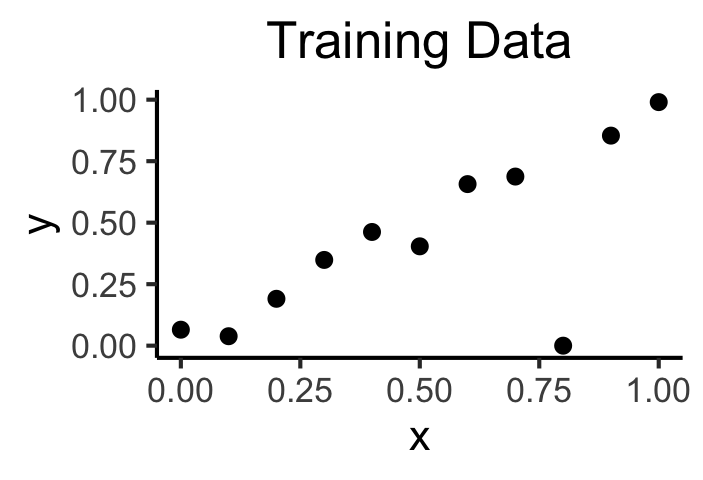

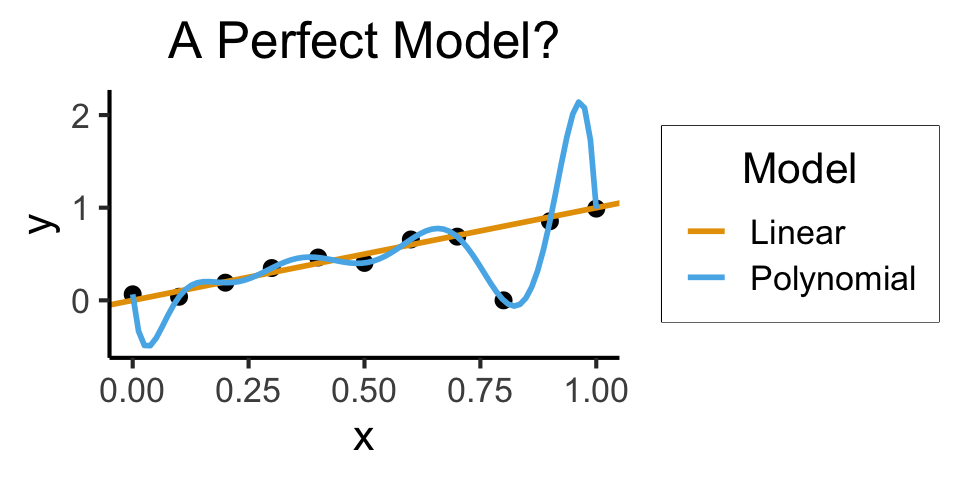

In [47]:
from IPython.display import HTML, Image
style = "<style>#output-body{display:flex; flex-direction: row;}</style>"
display(HTML(style))
base_url = "https://jpj.georgetown.domains/dsan5000-scratch/feature-selection"
tr_data_fname = "overfitting_training_data.png"
model_fname = "overfitting_models.png"
display(Image(f"{base_url}/{tr_data_fname}"))
display(Image(f"{base_url}/{model_fname}"))

> Here we can see the issue, when it comes to **performance on the training data** vs. **generalization**: the **polynomial** model, in this case, had many parameters that it could fit, such that it was able to produce a curve perfectly passing through every point in the training data, achieving 100% accuracy (here we're dealing with **continuous** rather than **discrete** data, so we can't use the F1 score, but the same intuition holds for how we evaluate regression tasks, which we'll learn soon 🙂)<br><br>However, when it comes time for our two trained models to try and predict the **label** (in this case, the **y value**) for a **new data point** which it has never seen before, we can see the issue with overfitting:

<img src='https://jpj.georgetown.domains/dsan5000-scratch/feature-selection/overfitting_test_data.png' width="40%"></img>

> We see that now, since the **underlying Data-Generating Process (DGP)** was **linear**, the polynomial model now does **worse** than the linear model, despite its perfect score on the training data. This is because, rather than trying to learn a <a href='https://en.wikipedia.org/wiki/Occam%27s_razor' target='_blank'>**parsimonious** model</a>---that is, a model that represents the data sufficiently well under the constraint of being as "simple" as possible---the polynomial model simply "memorized" the training data, in the sense of constructing an erratic line with lots of oscillation in order to perfectly hit every point.<br><br>Quantitatively, we can see the effects of overfitting by **comparing** the performance of the linear ($\textsf{Lin}$) and polynomial ($\textsf{Poly}$) models, not on the **training data** but on the unseen **test data**. Computing the $R^2$ value for both models, we get:

$$
\begin{align*}
R^2(\textsf{Lin}) &\approx 0.841 \\
R^2(\textsf{Poly}) &\approx 0.186
\end{align*}
$$

> and if we use a different metric which we'll see a lot more often for regression tasks, the **Residual Sum of Squares** (literally, the sum of the squared distances between each point and the prediction made by the algorithm, so that in this case higher values indicate worse performance), we get:

$$
\begin{align*}
RSS(\textsf{Lin}) &\approx 0.186 \\
RSS(\textsf{Poly}) &\approx 0.843
\end{align*}
$$

> *(You'll notice that, with respect to our data here, one of these measures seems to just be 1 minus the other measure---until we get to these measures in the class, you can dive into this and try to figure out if this will always be the case, and/or, why it is the case here!)*

### (6.3) Training the Model

Now that we understand these two important factors we'll need to worry about (**normalizing** the data and performing the **train-test split**) in any Machine Learning task, we can now finally train our SVM classifier on the **normalized training data**, using the `.fit()` function like we saw before, but this time on just the **training** data:

In [48]:
# Here I re-initialize the `clf` object, so that sklearn "starts from scratch"
# rather than thinking we want it to update the previous model (the model that
# was trained on the full dataset rather than just the training data). Also,
# since we're going to want to use the scaled data explicitly later on, here I
# do *not* use the make_pipeline() function like we did above, but manually
# apply the two steps (scaling and then training the SVC) separately
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
clf = svm.SVC()
clf.fit(X_train_scaled, y_train)

SVC()

### (6.4) Evaluating the Model

And now we can **evaluate** our trained model by seeing how well it does at predicting the **test data labels** when given the **test data features**:

In [49]:
X_test_scaled = scaler.transform(X_test)
test_predictions = clf.predict(X_test_scaled)
test_predictions

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0])

In [50]:
test_predictions.shape

(137,)

And we see that the `.predict()` function has given us an array of values representing the predictions made by our trained classifier given the **test data features** in `X_test`. To evaluate these predictions, just like we did before in the random-guessing and guess-most-frequent-label cases, we can compute the **F1 score** using the Scikit-learn function:

In [51]:
f1_score(
    y_true = y_test,
    y_pred = test_predictions
)

0.8783783783783783

And we are happy now since we see that, by actually **learning** statistical relationships between the features and the labels in the training data, we have been able to **beat both of our baseline models** in terms of F1 score! Our updated algorithm performance table now looks like (where I have removed the accuracy column, since that was just for demonstration of the earlier point about why we instead use F1 score):

| Algorithm | F1 Score |
| - | - |
| ML Algorithm + **Feature Selection** | **?** |
| ML Algorithm **without** Feature Selection | **0.878** |
| Baseline: Guess Most Frequent Label | **0.700** |
| Baseline: Random Guessing | **0.531** |


## (7) Augmenting our "Off-The-Shelf" Model With Feature Selection

Finally, we now not only have a pair of "overall" baselines (random-guessing and guess-most-frequent-label), but a baseline representing the performance of our classifier **without** any feature selection being performed, which we can use to quantify any **improvement** we're able to achieve over this base ML model by employing feature selection techniques.

Now, whereas for your Lab 3.2 Assignment you will be conducting a **grid search** over all possible subsets of the full set of features, to get you started here we will just take a few of the variables we talked about in the beginning of the lab (or in class):

* Some of which we think may be extremely helpful for predicting playoff success: e.g., `PtsSeason`, and
* Some of which we think may be redundant and unhelpful: e.g., including all three of `Reb`, `Oreb` and `Dreb` in our model, since mathematically `Reb` is just the sum of `Oreb` and `Dreb`.

So, using the definition of the **merit score** given to you at the beginning of the Lab 3.2 Assignment, let's take a player-related variable like `mean_height` and a team-related variable like `To` as our two "base" variables we'd like to include in our model, and compute a "base" merit score for this subset $S_2 = \{\texttt{mean\_height}, \texttt{To}\}$.

As a reminder, using our dictionary-format codebook, here are the descriptions and types of these two base variables:

In [52]:
codebook_dict['mean_height']

{'description': "Mean height of the team's members that year, in cm",
 'type': 'float'}

In [53]:
codebook_dict['To']

{'description': "The team's average number of turnovers per game that year",
 'type': 'float'}

Once we have this base merit score $S_2$ for these two features, we can examine how the merit score **changes** when:

1. We add `PtsSeason` to the base subset to form a new subset $S'_3 = \{\texttt{mean\_height}, \texttt{To}, \texttt{PtsSeason}\}$, or
2. We add the three variables we think may be unhelpful (`Reb`, `Oreb`, and `Dreb`) to the base subset to form a new subset $S'_5 = \{\texttt{mean\_height}, \texttt{To}, \texttt{Reb}, \texttt{Oreb}, \texttt{Dreb}\}$

So, let's start by computing our base merit score. We'll use the SciPy library here, since it comes with a nice <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html' target='_blank'>`spearmanr()` function</a> for computing the correlations we want. Note that this function generates an output containing **two** pieces of information: the info that we want, the correlation coefficient specifically, can be obtained by accessing the `.statistic` attribute on the result. That is, the following code will extract the correlation coefficient specifically from the object produced by `spearmanr()`:

```python
spearman_result = scipy.stats.spearmanr(vec1, vec2)
spearman_corr_coef = spearman_result.statistic
```

Or, to combine this into one line, you can use

```python
spearman_corr_coef = scipy.stats.spearmanr(vec1, vec2).statistic
```

Also, to make our lives easier, we'll quickly make a `DataFrame` object which contains the **scaled feature data** but with columns representing the **names** of each feature, so that we can easily go from the name of the feature that we want to the column index of that feature in `X_train_scaled`:

In [54]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_cols)
X_train_scaled_df.head()

,mean_age,mean_height,mean_weight,PtsSeason,OppPtsSeason,PtsDiff,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb
0,0.868557,-0.833381,-0.670704,0.449983,0.261535,0.258920,1.103405,0.130919,-0.716876,0.361359,0.681978,-1.959417,0.998052,0.001158
1,0.432615,0.129837,0.339992,-1.327738,-1.554359,0.347875,0.808684,-0.907914,1.088957,-0.622078,0.326078,-0.754511,-0.119384,1.405650
2,0.884333,-1.188430,-0.578330,-0.042065,0.308498,-0.497191,-0.370201,-0.611105,1.314686,-0.745007,-1.008545,0.220889,-0.352183,0.001158
3,-0.001146,-0.720411,0.774420,-0.216663,-0.286364,0.103250,-0.812282,1.169751,0.524634,-0.622078,0.148128,-1.672534,0.206535,-1.473560
4,0.404715,-0.637567,-0.560475,-0.010320,0.167610,-0.252567,-0.812282,0.130919,-0.265418,-1.359655,-0.296746,1.597924,-1.004021,0.422505


### (7.1) The Base Merit Score $S_2$

In [55]:
from scipy.stats import spearmanr
# Computing the base merit score S_2. Here we're going to use Spearman correlation coefficients,
# though remember that your assignment code needs to work for *either* Pearson
# or Spearman correlation coefficients
# Step 1: Compute the between-feature correlations
included_vars_s2 = ['mean_height', 'To']
included_vars_df = X_train_scaled_df[included_vars_s2].copy()
height_turnover_corr = spearmanr(included_vars_df['mean_height'], included_vars_df['To']).statistic
height_turnover_corr

-0.073349157425512

In [56]:
# Step 2: Compute the correlations between each feature and the label
height_playoff_corr = spearmanr(included_vars_df['mean_height'], y_train).statistic
height_playoff_corr

0.01256038600061839

In [57]:
turnover_playoff_corr = spearmanr(included_vars_df['To'], y_train).statistic
turnover_playoff_corr

-0.30211010989735243

In [58]:
k = 2
# Since we only have two features here, we have only one correlation value, so
# that the mean is just this one value
mean_xx_corr = height_turnover_corr
# mean_xy_corr is the mean of the two feature-vs-label correlations we computed
# above
mean_xy_corr = np.mean([height_playoff_corr, turnover_playoff_corr])
print(f"Number of features: {k}")
merit_score_numer = k * np.absolute(mean_xy_corr)
merit_score_denom = np.sqrt(k + k * (k + 1) * np.absolute(mean_xx_corr))
merit_score_s2 = merit_score_numer / merit_score_denom
print(f"Merit score: {merit_score_s2}")

Number of features: 2
Merit score: 0.18536160983305905


### (7.2) The Augmented Merit Score $S'_3$

Next we can compute the merit score for $S'_{3}$: here we're including `mean_height`, `To`, and `PtsSeason`, so that the math will get a bit more complicated, since we have to consider all possible pairs of features. So, to handle this and to prepare us for future cases, we'll make a function which lets us compute the correlation coefficients for general subsets of the features:

*(Note that this is **not** the most efficient way to do this! Loops almost never are. But in this case I'm writing the function using a loop to make it a bit more straightforward how the function works / how it makes sure to consider all possible pairs)*

In [59]:
# A quick illustration of how the itertools.combinations() function works
import itertools
x = ['a','b','c']
list(itertools.combinations(x, 2))

[('a', 'b'), ('a', 'c'), ('b', 'c')]

In [60]:
# And while we're looking at helpful Python utilities for making nice variables
# to loop over: how Python's built-in zip() function works
x = ['a','b','c']
y = [1, 2, 3]
list(zip(x,y))

[('a', 1), ('b', 2), ('c', 3)]

In [61]:
# And finally, how itertools.product() works to create cartesian products
x = ['a','b','c']
c = [10]
list(itertools.product(x,c))

[('a', 10), ('b', 10), ('c', 10)]

In [62]:
def compute_mean_xx_corr(x_df):
  df_colnames = x_df.columns
  # This will contain our final set of x<->x correlations
  xx_corrs = []
  # Now we use itertools to iterate over all possible *pairs* of
  # elements from df_cols
  df_colname_pairs = itertools.combinations(df_colnames, 2)
  for colname1, colname2 in df_colname_pairs:
    # Extract the first column we're considering
    col1 = x_df[colname1]
    # Extract the second column
    col2 = x_df[colname2]
    # And compute the correlation
    xx_pair_corr = spearmanr(col1, col2).statistic
    xx_corrs.append(xx_pair_corr)
  # And now that the loop has finished running, we can return the **mean**
  # of the correlation values we've accumulated in the `xx_corrs` list
  return np.mean(xx_corrs)

def compute_mean_xy_corr(x_df, y_vec):
  df_colnames = x_df.columns
  xy_corrs = []
  for colname in df_colnames:
    x_col = x_df[colname]
    xy_pair_corr = spearmanr(x_col, y_vec)
    xy_corrs.append(xy_pair_corr)
  # And return the mean
  return np.mean(xy_corrs)

In [63]:
included_vars_sp3 = ['mean_height', 'To', 'PtsSeason']
included_vars_df = X_train_scaled_df[included_vars_sp3].copy()
mean_xx_corr = compute_mean_xx_corr(included_vars_df)
mean_xy_corr = compute_mean_xy_corr(included_vars_df, y_train)
mean_xx_corr, mean_xy_corr

(-0.117371681544074, 0.1169299925506893)

So that now we can create a simple `compute_merit_score()` function that takes these outputs from `compute_mean_xx_corr()` and `compute_mean_xy_corr()` and uses them to produce a merit score:

In [64]:
def compute_merit_score(num_features, mean_xx_corr, mean_xy_corr):
  merit_score_numer = k * np.absolute(mean_xy_corr)
  merit_score_denom = np.sqrt(k + k * (k + 1) * np.absolute(mean_xx_corr))
  merit_score = merit_score_numer / merit_score_denom
  return merit_score

merit_score_sp3 = compute_merit_score(3, mean_xx_corr, mean_xy_corr)
print(f"Merit score (S'_3): {merit_score_sp3}")

Merit score (S'_3): 0.14221129699638796


### (7.3) The Augmented Merit Score $S'_5$

Now let's use the same functions we used to compute $S'_3$ here, to compute the needed $x$-to-$x$ and $x$-to-$y$ correlation coefficients for the subset of 5 features:

In [65]:
included_vars_sp5 = ['mean_height', 'To', 'Reb', 'Oreb', 'Dreb']
included_vars_df = X_train_scaled_df[included_vars_sp5].copy()
mean_xx_corr = compute_mean_xx_corr(included_vars_df)
mean_xy_corr = compute_mean_xy_corr(included_vars_df, y_train)
mean_xx_corr, mean_xy_corr

(0.0601995027606065, 0.07702604065042143)

In [66]:
merit_score_sp5 = compute_merit_score(5, mean_xx_corr, mean_xy_corr)
print(f"Merit score (S'_5): {merit_score_sp5}")

Merit score (S'_5): 0.10025394179618205


### (7.4) Putting the Three Scores Together

So we can see that, just checking these three potential subsets of all the features, we obtain the following merit scores:

| Subset | Variables Included | Merit Score |
| - | - | - |
| $S_2$ | `mean_height`, `To` | **0.185** |
| $S'_3$ | `mean_height`, `To`, `PtsSeason` | **0.142** |
| $S'_5$ | `mean_height`, `To`, `Reb`, `Oreb`, `Dreb` | **0.100** |

Like we expected, the subset with the lowest merit was the subset containing redundant information: we don't need all three of `Reb`, `Oreb`, and `Dreb`, but only (if we want to include information about rebounds) at most two of the three. So, for example, let's compute one more merit score for a new subset $S''_3$, seeing if we can improve upon the 0.100 score if we only include `Reb`:

In [67]:
included_vars_spp3 = ['mean_height', 'To', 'Reb']
included_vars_df = X_train_scaled_df[included_vars_spp3].copy()
mean_xx_corr = compute_mean_xx_corr(included_vars_df)
mean_xy_corr = compute_mean_xy_corr(included_vars_df, y_train)
mean_xx_corr, mean_xy_corr

(-0.022629044631427443, 0.10761536360841224)

In [68]:
merit_score_spp3 = compute_merit_score(3, mean_xx_corr, mean_xy_corr)
print(f"Merit score (S''_3): {merit_score_spp3}")

Merit score (S''_3): 0.14727417486943475


And, to add one more relevant piece to our investigation, let's also compute the score for a new subset $S'_4$ where we include `Reb` **as well as** `PtsSeason` on top of our base variables:

In [69]:
included_vars_sp4 = ['mean_height', 'To', 'Reb', 'PtsSeason']
included_vars_df = X_train_scaled_df[included_vars_sp4].copy()
mean_xx_corr = compute_mean_xx_corr(included_vars_df)
mean_xy_corr = compute_mean_xy_corr(included_vars_df, y_train)
mean_xx_corr, mean_xy_corr

(0.007649292847057176, 0.10839650518198726)

In [70]:
merit_score_sp4 = compute_merit_score(4, mean_xx_corr, mean_xy_corr)
print(f"Merit score (S'_4): {merit_score_sp4}")

Merit score (S'_4): 0.15156660582136663


Our final merit score table (sorted by merit score, in decreasing order) now looks like:

| Subset | Variables Included | Merit Score |
| - | - | - |
| $S_2$ | `mean_height`, `To` | **0.185** |
| $S'_4$ | `mean_height`, `To`, `Reb`, `PtsSeason` | **0.152** |
| $S''_3$ | `mean_height`, `To`, `Reb` | **0.147** |
| $S'_3$ | `mean_height`, `To`, `PtsSeason` | **0.142** |
| $S'_5$ | `mean_height`, `To`, `Reb`, `Oreb`, `Dreb` | **0.100** |

And so we see that, despite getting somewhat close to our base (2-variable) subset $S_2$ by including `Reb` and `PtsSeason` while excluding `Oreb` and `Dreb`, there still wasn't enough **additional information** contained in `Reb` and/or `PtsSeason` to **justify** using these in addition to `mean_height` and `To`. In other words, if we adopt this merit score as our metric, then out of these five possible subsets of the full feature space, we expect that we will get the best performance by just using the subset $S_2$ to predict the labels. Let's see what happens when we try this, using our SVM classifier:

In [71]:
included_vars_s2 = ['mean_height', 'To']
X_train_scaled_s2 = X_train_scaled_df[included_vars_s2].copy()
# We'll call our new classifier, where we're using feature selection to train
# it on only a subset of the full set of features, fs_clf, where the "fs"
# stands for "feature selection"
fs_clf = svm.SVC()
fs_clf.fit(X_train_scaled_s2, y_train)

SVC()

In [72]:
# And evaluate, as before
X_test_scaled_s2 = X_test_scaled_df[included_vars_s2].copy()
test_predictions = fs_clf.predict(X_test_scaled_s2)
test_predictions

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1])

In [73]:
f1_score(
    y_true = y_test,
    y_pred = test_predictions
)

0.6293706293706294

And we see, to our horror, that our fairly *ad hoc* feature selection step did **not** improve our performance at all. In fact, it decreased our performance to the point that now our SVM does worse (in terms of F1 score, at least) than the guess-most-frequent-label approach 😰

Why did this happen? There are many potential reasons, but first off we can notice that we **did not check all possible subsets of our features!** The two variables we chose as our "base" variables may have been bad choices in this case, which constrained all of our subsequent subsets to also be bad choices for predictive subsets of the full feature space.

It also may be that, in terms of our particular setting, the merit score over-penalizes the inclusion of additional features: typically, when we're dealing with large datasets with e.g. thousands or millions of features, it's a **good thing** for the merit score to harshly penalize the inclusion of lots of additional variables, since we are trying to trim the feature space way down to just a few features which are extremely effective (in combination) for predicting the labels. Here, since we only have **14 features** in total, we may not need to apply such a harsh penalty until (say) the number of included features passes 7, since anything below 7 means we're cutting the number of features in half.

So, I'll leave it to you to figure out if perhaps there is a better **feature selection approach** in this case (notice how many different feature selection methods are <a href='https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection' target='_blank'>implemented in Scikit-learn</a>, each one having different advantages and drawbacks in any given ML scenario!), but I used some fairly-simple methods available in Scikit-learn to arrive at the following subset:

$$
S''_4 = \{\texttt{mean\_age}, \texttt{OppPtsSeason}, \texttt{PtsDiff}, \texttt{To}\}
$$

which is **not** guaranteed to be the optimal subset, but **does** beat out our baseline off-the-shelf ML model, to produce a final **F1 score table** as follows (where I've given abbreviations to each algorithm, which I use in the plot below):

| ID | Algorithm | F1 Score |
| - | - | - |
| ML+FS | ML Algorithm + **Feature Selection** | **0.898** |
| ML | ML Algorithm **without** Feature Selection | **0.878** |
| MFL | Baseline: Guess Most Frequent Label | **0.700** |
| RG | Baseline: Random Guessing | **0.531** |

So that we can **plot the progress we made** as we used more and more sophisticated techniques:

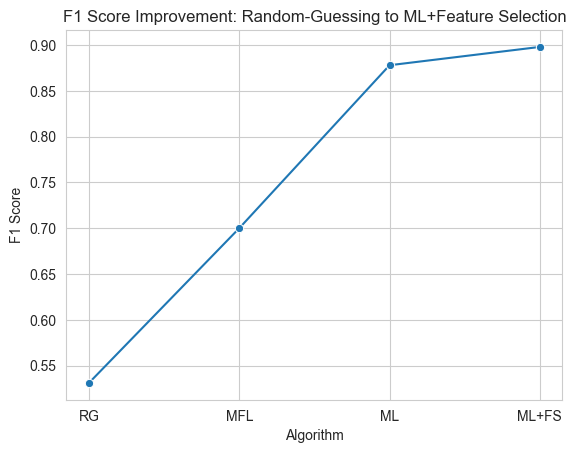

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
algs = ['RG', 'MFL', 'ML', 'ML+FS']
scores = [0.531, 0.700, 0.878, 0.898]
alg_df = pd.DataFrame({'Algorithm': algs, 'F1 Score': scores})
sns.lineplot(data=alg_df, x='Algorithm', y='F1 Score', marker='o')
plt.title("F1 Score Improvement: Random-Guessing to ML+Feature Selection")
plt.show()

In fact, to illustrate a bit more how effective feature selection can be: the approach I used, while being extremely "greedy" and thus not guaranteed to be optimal, still beat out the baseline ML model for every value of $K$ (the number of features to select) besides $K = 13$, as can be seen in the following plot:

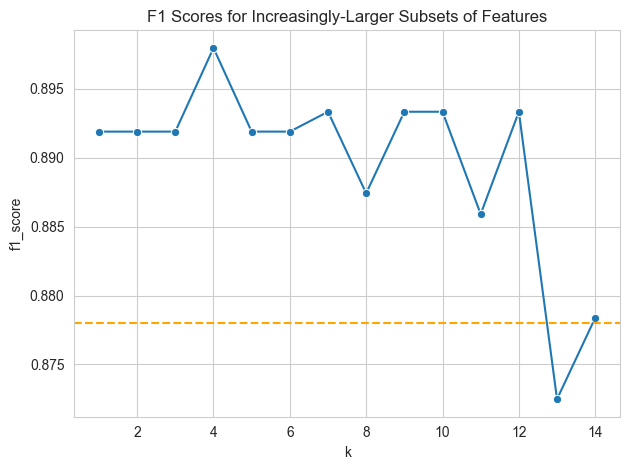

In [75]:
fs_data_url = "https://jpj.georgetown.domains/dsan5000-scratch/feature-selection/fs_scores.csv"
fs_df = pd.read_csv(fs_data_url)
plot_obj = sns.lineplot(data=fs_df, x='k', y='f1_score', marker='o')
plot_obj.axhline(0.878, ls='--', color='orange')
plt.title("F1 Scores for Increasingly-Larger Subsets of Features")
plt.tight_layout()
plt.show()

## Appendix: Possibly Helpful Code

In [76]:
# In case you need this, to get all possible subsets of a python list!
from itertools import chain, combinations
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
#list(powerset(my_list))